In [1]:
%matplotlib inline
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
data_2d_df = pd.read_csv("Hw6/data/data_2d.csv", names=['y', 'X1', 'X2'])

In [3]:
data_2d_df.head()

,y,X1,X2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218


In [4]:
mnist_df = pd.read_csv("Hw6/data/mnist.csv", header=None)

In [5]:
mnist_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Стандартизація та перетворення датасету mnist у двовимірний за алгоритмом PCA

In [7]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(mnist_df)

pca = PCA(n_components=2)
mnist_pca = pca.fit_transform(data_scaled)

## За ліктевим методом, визначимо оптимальну кількість кластерів для моделі

E:\Programs\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
E:\Programs\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
E:\Programs\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
E:\Programs\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

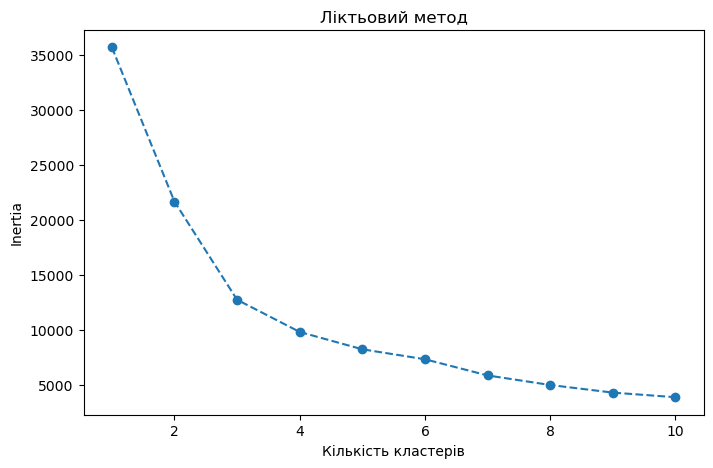

In [9]:
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(mnist_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Ліктьовий метод')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.show()

## На графіку видно, що 3 кластера вважається найоптимальнішим варіантом, так як це число формує лікоть

## Спочатку побудуєм модель за 10 кластерами, так як це датасет з числами від 0 до 9.

In [12]:
kmeans_mnist_10 = KMeans(n_clusters=10, random_state=42).fit(mnist_pca)

E:\Programs\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [13]:
labels_mnist_10 = kmeans_mnist_10.predict(mnist_pca)

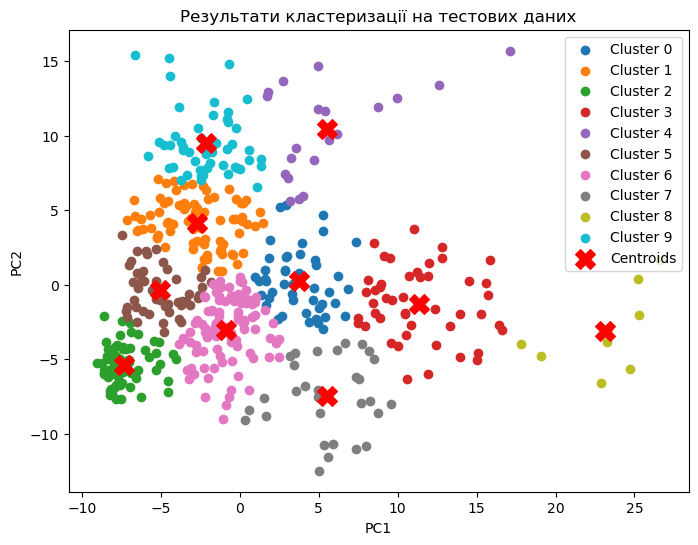

In [14]:
plt.figure(figsize=(8, 6))

for cluster in range(10):
    cluster_data = mnist_pca[labels_mnist_10 == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

plt.scatter(kmeans_mnist_10.cluster_centers_[:, 0], kmeans_mnist_10.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')

plt.title('Результати кластеризації на тестових даних')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## На графіку видно центри кластерів - червоні хрестики, та координати ознак, які відносяться до певних кластерів - відокремлені кольором.

In [16]:
silhouette = silhouette_score(mnist_pca, labels_mnist_10)
silhouette

0.36795230690323266

## Ми перевірили силуетний коефіцієнт. Це метрика, яка дає зрозуміти, настільки добре кластери відокремлені одне від одного (чим ближчий результат до числа 1, тим краща кластеризація)

## Тепер навчимо модель з кількістю кластерів 3, так як це оптимальна кількість кластерів, яку вирахував ліктьовий метод.

E:\Programs\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


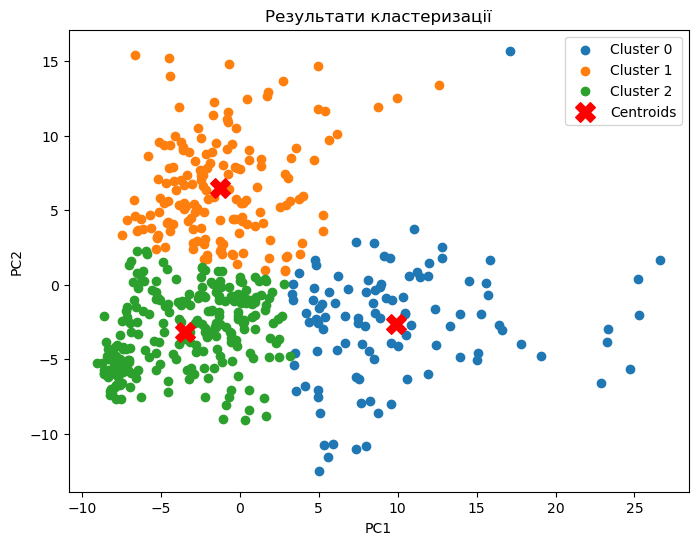

In [19]:
kmeans_mnist_3 = KMeans(n_clusters=3, random_state=42).fit(mnist_pca)

labels_mnist_3 = kmeans_mnist_3.predict(mnist_pca)

plt.figure(figsize=(8, 6))

for cluster in range(3):
    cluster_data = mnist_pca[labels_mnist_3 == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

plt.scatter(kmeans_mnist_3.cluster_centers_[:, 0], kmeans_mnist_3.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')

plt.title('Результати кластеризації')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [20]:
silhouette = silhouette_score(mnist_pca, labels_mnist_3)
silhouette

0.4337464989745955

## Силуетний коефіцієнт трохи покращився, але тепер модель стала більш загальною для прогнозування цифр

## Тепер інший, 2D датасет. Розіб'ємо його на незалежні змінні та цільову

In [23]:
data_2d_X = data_2d_df.drop(columns=['y'])
data_2d_y = data_2d_df["y"]

data_2d_X = data_2d_X.to_numpy()
data_2d_y = data_2d_y.to_numpy()

## Розрахуємо оптимальну кількість кластерів та візуалізуємо на графіку варіанти кластеризації

E:\Programs\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Programs\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Programs\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Programs\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

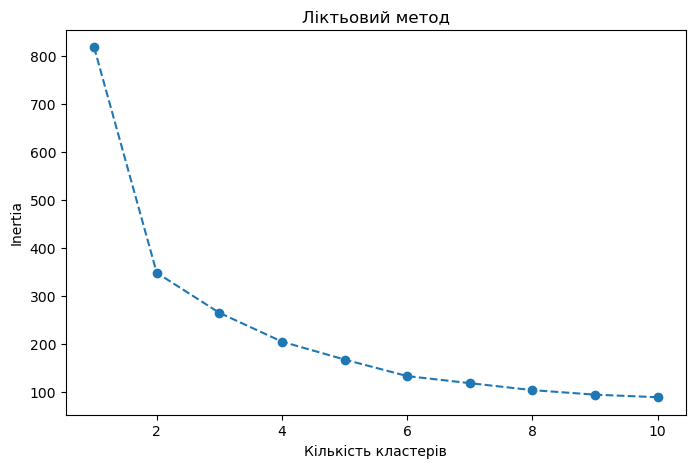

In [25]:
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_2d_X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Ліктьовий метод')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.show()

## Лікоть утворюється на числі кластерів 2, воно і очевидно, бо в нас цільова змінна розбита на 2 класи

## Навчаємо модель на кількості кластерів: 2

In [28]:
kmeans_data_2d = KMeans(n_clusters=2, random_state=42).fit(data_2d_X)

E:\Programs\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
labels_data_2d = kmeans_data_2d.predict(data_2d_X)

## Порівняємо прогнозовані мітки моделі з цільовими мітками за метриками accuracy та classification report

In [66]:
accuracy_score(data_2d_y, labels_data_2d)

0.895

In [32]:
print(classification_report(data_2d_y, labels_data_2d))

              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89       100
         1.0       0.88      0.92      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200



## Точність прогнозу моделі K-means показує 89%. Досить непоганий результат для навчання без учителя, але не найкращий

## Візуалізація прогнозів моделі

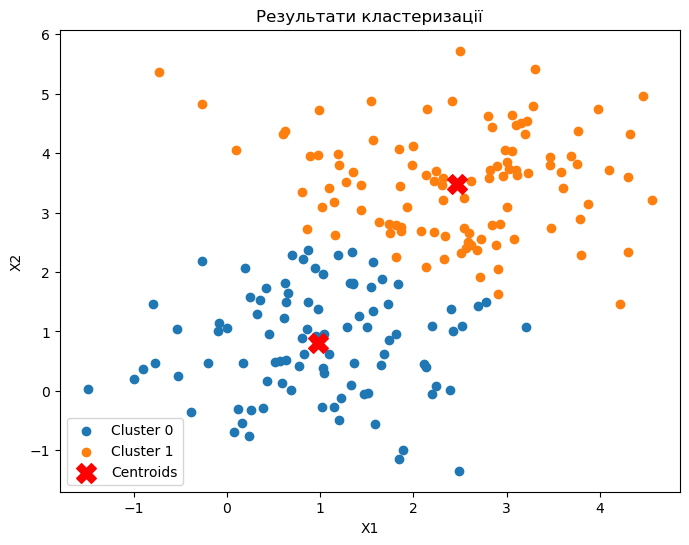

In [56]:
plt.figure(figsize=(8, 6))

for cluster in range(2):
    cluster_data = data_2d_X[labels_data_2d == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

plt.scatter(kmeans_data_2d.cluster_centers_[:, 0], kmeans_data_2d.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')

plt.title('Результати кластеризації')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

## Висновок:

## Обидві моделі різних датасетів мають не найкращий результат точності передбачень і потребують допрацювань якості передбачень, наприклад можна усунути аномальні значення в датасеті для покращення розрахунку центроїдів та кращого відокремлення кластерів.